In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [397]:
df = pd.read_excel('BookingProjectClean.xlsx')

In [398]:
df.head(5)
pd.set_option('display.float_format', '{:.2f}'.format)

In [399]:
df.describe()

,Price,ReviewsCount,Rating
count,474.00,474.00,474.00
mean,124.77,795.37,8.33
std,62.32,888.29,0.67
min,39.88,13.00,5.50
25%,85.77,362.75,8.00
50%,110.06,500.00,8.40
75%,138.92,932.00,8.80
max,534.39,7748.00,9.80


In [400]:
mean_price = np.mean(df['Price'])
median_price = np.median(df['Price'])

mean_reviews = np.mean(df['ReviewsCount'])
median_reviews = np.median(df['ReviewsCount'])

mean_rating = np.mean(df['Rating'])
median_rating = np.median(df['Rating'])

In [401]:
mean_reviews

795.3691983122363

In [402]:
def hist_plot(metric, xaxis):  
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(df[metric], bins=30, stat='density', ax=ax)
    sns.kdeplot(df[metric], fill=True, ax=ax, color='blue', alpha=0.1)
    ax.axvline(df[metric].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[metric].median(), color='green', linestyle='-', label='Median')
    ax.set_xlabel(xaxis)
    plt.xlim(df[metric].min(), df[metric].max())
    ax.legend()
    plt.savefig(metric + '.png', dpi=300)
    plt.show()

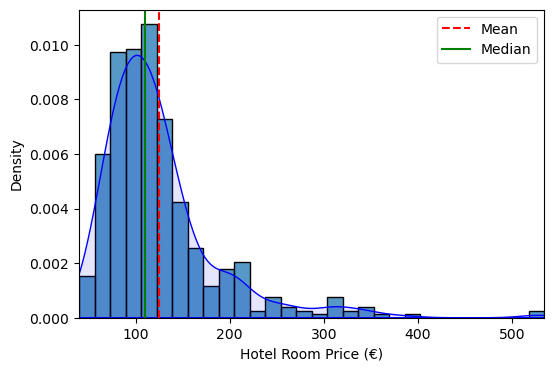

In [403]:
hist_plot('Price', 'Hotel Room Price (€)')

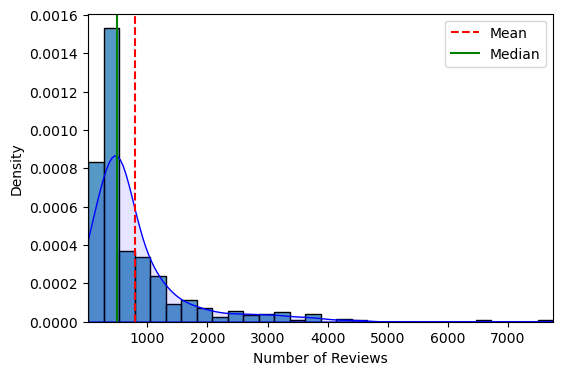

In [404]:
hist_plot('ReviewsCount', 'Number of Reviews')

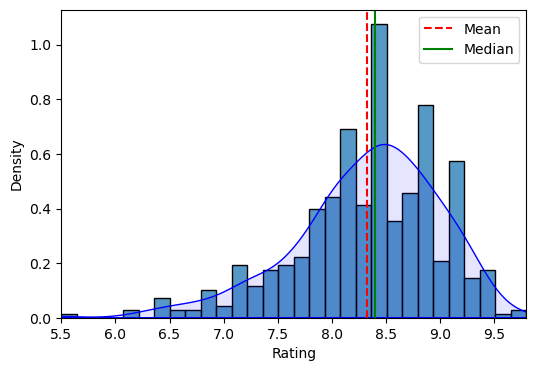

In [405]:
hist_plot('Rating', 'Rating')

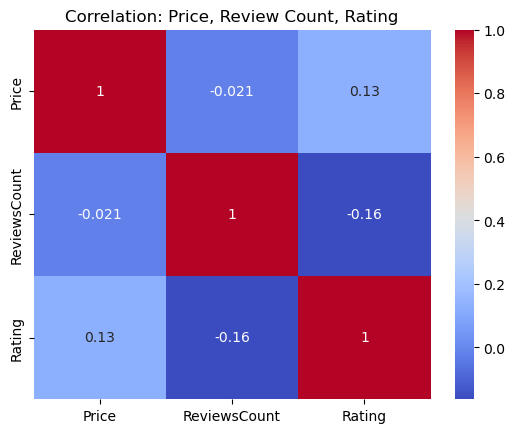

<Figure size 640x480 with 0 Axes>

In [406]:
cols = ['Price', 'ReviewsCount', 'Rating']
corr = df[cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Price, Review Count, Rating')
plt.show()
plt.savefig('correlation_price_reviews_rating' + '.png', dpi=300)

In [407]:
df.head()

,Name,Place,Type,Price,ReviewsCount,Rating,Type_Room
0,'t Goude Hooft,"The Hague City Centre, The Hague",Deluxe Suite,195.36,375,9.00,Premium Suite
1,3BE Backpackers Bed & Breakfast Eindhoven,"Eindhoven City Centre, Eindhoven",Single Bed in 14-Bed Dormitory Room,60.35,805,8.00,Dorm
2,Amadeus Hotel,Haarlem,Budget Double Room,65.15,1281,7.70,Standard Double
3,Ambassador City Centre Hotel,Haarlem,Comfort Room,90.05,807,7.70,Other
4,Amrâth Grand Hotel Frans Hals,Haarlem,Deluxe Twin Room,118.82,1730,8.00,Premium Twin


In [408]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Price_norm'] = scaler.fit_transform(df[['Price']])
df['Price_norm'] = 1 - df['Price_norm']
df['Review_Count_norm'] = scaler.fit_transform(df[['ReviewsCount']])
df['Rating_norm'] = scaler.fit_transform(df[['Rating']])

In [409]:
df.head()

,Name,Place,Type,Price,ReviewsCount,Rating,Type_Room,Price_norm,Review_Count_norm,Rating_norm
0,'t Goude Hooft,"The Hague City Centre, The Hague",Deluxe Suite,195.36,375,9.00,Premium Suite,0.69,0.05,0.81
1,3BE Backpackers Bed & Breakfast Eindhoven,"Eindhoven City Centre, Eindhoven",Single Bed in 14-Bed Dormitory Room,60.35,805,8.00,Dorm,0.96,0.10,0.58
2,Amadeus Hotel,Haarlem,Budget Double Room,65.15,1281,7.70,Standard Double,0.95,0.16,0.51
3,Ambassador City Centre Hotel,Haarlem,Comfort Room,90.05,807,7.70,Other,0.90,0.10,0.51
4,Amrâth Grand Hotel Frans Hals,Haarlem,Deluxe Twin Room,118.82,1730,8.00,Premium Twin,0.84,0.22,0.58


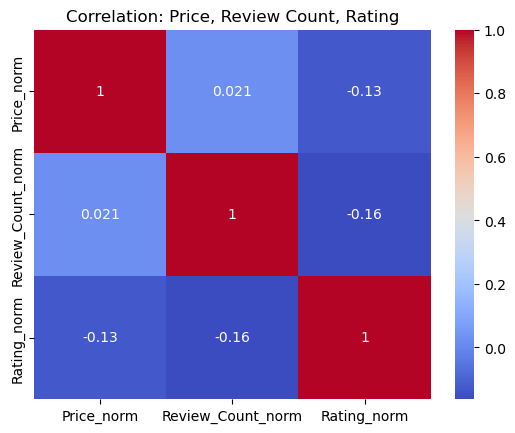

In [410]:
cols = ['Price_norm', 'Review_Count_norm', 'Rating_norm']
corr = df[cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Price, Review Count, Rating')
plt.savefig('correlation_price_reviews_rating_normalized' + '.png', dpi=300)
plt.show()


In [411]:
df['Overall_Score'] = df['Price_norm']*df['Review_Count_norm']*df['Rating_norm']*100

In [412]:
df['Overall_Score_Normalized'] = scaler.fit_transform(df[['Overall_Score']])
df['Overall_Score_Normalized'] = df['Overall_Score_Normalized']*100

In [413]:
df.sort_values(['Overall_Score_Normalized'], ascending=False, inplace=True)

In [414]:
df.head()

,Name,Place,Type,Price,ReviewsCount,Rating,Type_Room,Price_norm,Review_Count_norm,Rating_norm,Overall_Score,Overall_Score_Normalized
415,The James Rotterdam,"Centrum, Rotterdam",Economy Double Room,70.58,6631,8.80,Double,0.94,0.86,0.77,61.59,100.00
287,Hotel the Match,"Eindhoven City Centre, Eindhoven",Standard Double Room,64.50,4566,8.70,Standard Double,0.95,0.59,0.74,41.62,67.59
167,Grand Hotel Amrâth Kurhaus The Hague Scheveningen,Scheveningen,Superior Double Room,156.80,7748,7.20,Premium Double,0.76,1.00,0.40,30.19,49.02
366,Queen Hotel,"Eindhoven City Centre, Eindhoven",King Room,61.27,3075,8.80,Double,0.96,0.40,0.77,29.07,47.20
298,Inntel Hotels Utrecht Centre,"City Centre, Utrecht",City Double Room,117.57,3803,8.50,Double,0.84,0.49,0.70,28.81,46.79


In [415]:
df['ReviewCount_Log'] = np.log1p(df['ReviewsCount'])
df['Review_Count_log_norm'] = scaler.fit_transform(df[['ReviewCount_Log']])

In [416]:
df['Overall_Score_LogRev'] = df['Price_norm']*df['Review_Count_log_norm']*df['Rating_norm']*100
df['Overall_Score_LogRev'] = scaler.fit_transform(df[['Overall_Score_LogRev']])
df['Overall_Score_LogRev'] = df['Overall_Score_LogRev']*100

In [417]:
df.head(5)

,Name,Place,Type,Price,ReviewsCount,Rating,Type_Room,Price_norm,Review_Count_norm,Rating_norm,Overall_Score,Overall_Score_Normalized,ReviewCount_Log,Review_Count_log_norm,Overall_Score_LogRev
415,The James Rotterdam,"Centrum, Rotterdam",Economy Double Room,70.58,6631,8.80,Double,0.94,0.86,0.77,61.59,100.00,8.80,0.98,100.00
287,Hotel the Match,"Eindhoven City Centre, Eindhoven",Standard Double Room,64.50,4566,8.70,Standard Double,0.95,0.59,0.74,41.62,67.59,8.43,0.92,92.29
167,Grand Hotel Amrâth Kurhaus The Hague Scheveningen,Scheveningen,Superior Double Room,156.80,7748,7.20,Premium Double,0.76,1.00,0.40,30.19,49.02,8.96,1.00,43.00
366,Queen Hotel,"Eindhoven City Centre, Eindhoven",King Room,61.27,3075,8.80,Double,0.96,0.40,0.77,29.07,47.20,8.03,0.85,89.29
298,Inntel Hotels Utrecht Centre,"City Centre, Utrecht",City Double Room,117.57,3803,8.50,Double,0.84,0.49,0.70,28.81,46.79,8.24,0.89,74.33


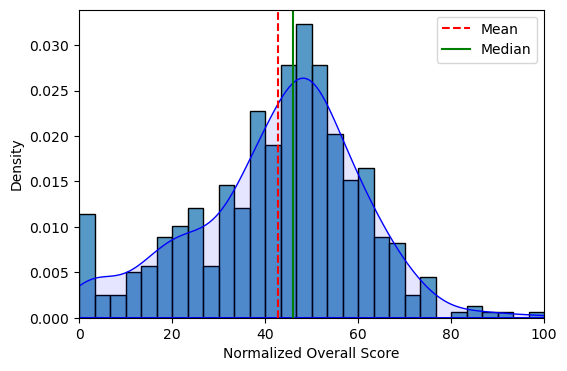

In [418]:
hist_plot('Overall_Score_LogRev', 'Normalized Overall Score')

In [419]:
df_grouped = df.groupby('Place').agg({
    'Name': 'count',
    'Price': 'mean',
    'ReviewsCount': 'mean',
    'Rating': 'mean',
    'Overall_Score_Normalized': 'mean',
    'Overall_Score_LogRev': 'mean'})

In [420]:
df_grouped.sort_values(['Overall_Score_LogRev'], ascending=False, inplace=True)

In [421]:
df_grouped.to_excel('test.xlsx', index_label=False)

In [422]:
df_rooms = df.groupby('Type_Room').agg({
    'Name': 'count',
    'Price': 'mean',
    'ReviewsCount': 'mean',
    'Rating': 'mean',
    'Overall_Score_Normalized': 'mean',
    'Overall_Score_LogRev': 'mean'})

In [423]:
filtered_df.groupby('Type_Room')['Overall_Score_LogRev'].mean()

Type_Room
Apartment           25.19
Dorm                43.41
Double              44.39
Family              36.50
Premium Apartment   32.18
Premium Double      45.52
Premium Family      47.50
Premium Quadruple   39.75
Premium Single      53.57
Premium Studio      39.81
Premium Suite       40.92
Premium Twin        44.69
Quadruple           41.49
Standard Dorm       32.72
Standard Double     47.69
Standard Suite      48.30
Standard Triple     42.98
Standard Twin       46.82
Studio              37.57
Suite               45.45
Triple              53.92
Twin                46.21
Name: Overall_Score_LogRev, dtype: float64

In [424]:
df_rooms.sort_values(['Overall_Score_LogRev'], ascending=False, inplace=True)

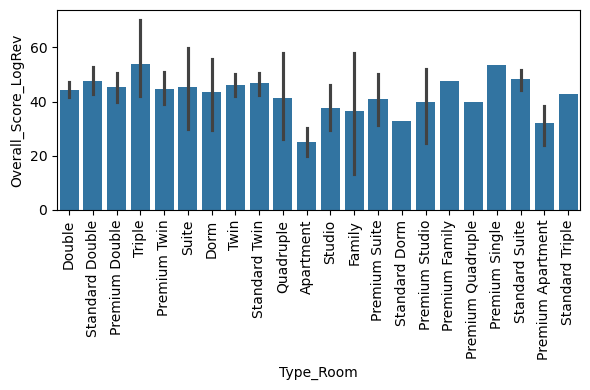

In [425]:
fig, ax = plt.subplots(figsize=(6, 4))

filtered_df = df[df['Type_Room'] != 'Other']
filtered_df = filtered_df[filtered_df['Type_Room'] != 'Standard Other']
filtered_df = filtered_df[filtered_df['Type_Room'] != 'Premium Other']

sns.barplot(data=filtered_df, x='Type_Room', y='Overall_Score_LogRev', ax=ax)
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('bar_rooms.png', dpi=300)
plt.show()


C:\Users\pstav\AppData\Local\Temp\ipykernel_24000\1610319173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[cols].corr()


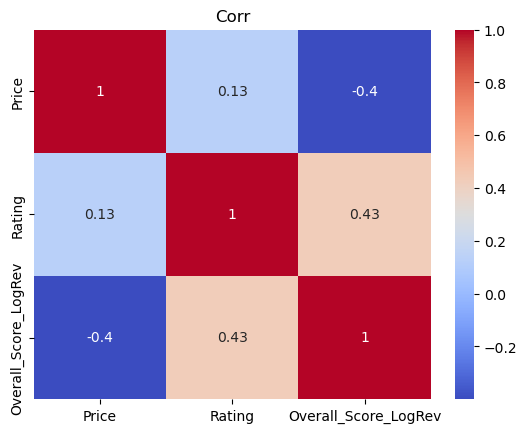

In [426]:
cols = ['Place', 'Type_Room', 'Price', 'Rating', 'Overall_Score_LogRev']
corr = df[cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corr')
plt.show()

In [427]:
df.describe()

,Price,ReviewsCount,Rating,Price_norm,Review_Count_norm,Rating_norm,Overall_Score,Overall_Score_Normalized,ReviewCount_Log,Review_Count_log_norm,Overall_Score_LogRev
count,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00
mean,124.77,795.37,8.33,0.83,0.10,0.66,5.29,8.59,6.15,0.56,42.85
std,62.32,888.29,0.67,0.13,0.11,0.15,6.09,9.89,1.17,0.19,17.65
min,39.88,13.00,5.50,0.00,0.00,0.00,0.00,0.00,2.64,0.00,0.00
25%,85.77,362.75,8.00,0.80,0.05,0.58,2.13,3.46,5.90,0.52,32.76
50%,110.06,500.00,8.40,0.86,0.06,0.67,3.72,6.04,6.22,0.57,45.99
75%,138.92,932.00,8.80,0.91,0.12,0.77,6.19,10.05,6.84,0.66,54.25
max,534.39,7748.00,9.80,1.00,1.00,1.00,61.59,100.00,8.96,1.00,100.00


In [428]:
np.median(df['Overall_Score_LogRev'])

45.98923800862764

In [429]:
df_grouped.describe()

,Name,Price,ReviewsCount,Rating,Overall_Score_Normalized,Overall_Score_LogRev
count,49.00,49.00,49.00,49.00,49.00,49.00
mean,9.67,134.60,800.91,8.32,8.26,43.14
std,8.87,79.66,451.48,0.35,4.21,12.28
min,1.00,62.05,123.45,7.35,0.14,1.08
25%,1.00,95.52,500.00,8.10,5.86,40.82
50%,5.00,113.36,655.42,8.33,7.40,44.60
75%,20.00,129.92,921.00,8.58,10.28,50.77
max,25.00,522.52,2136.00,9.10,22.51,69.33


In [430]:
df_rooms.describe()

,Name,Price,ReviewsCount,Rating,Overall_Score_Normalized,Overall_Score_LogRev
count,25.00,25.00,25.00,25.00,25.00,25.00
mean,18.96,134.29,809.28,8.38,8.39,43.09
std,28.15,30.35,461.00,0.45,3.93,7.16
min,1.00,84.55,242.50,7.00,2.54,25.19
25%,3.00,109.91,451.25,8.19,4.72,39.75
50%,7.00,125.23,827.57,8.48,8.86,44.39
75%,21.00,150.76,979.20,8.73,10.48,47.50
max,128.00,197.16,2064.00,8.90,18.59,55.40
